In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading and Preprocessing

In [6]:
# Loading file in pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/TXTA/ENDTERM/Reviews.csv'
df = pd.read_csv(path)
print(df.shape)
df.head(2)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
#Checking Datatypes
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [9]:
# droping columns not required
df.drop(columns=['Id','ProfileName'], inplace=True)

In [10]:
# converting timestamp to time
from datetime import datetime
df['Time'] = df['Time'].apply(lambda x: datetime.fromtimestamp(x))

In [11]:
# checking null values
df.isnull().sum()/df.shape[0]*100  # Summary has only 0.00475% null values. So drop them

ProductId                 0.00000
UserId                    0.00000
HelpfulnessNumerator      0.00000
HelpfulnessDenominator    0.00000
Score                     0.00000
Time                      0.00000
Summary                   0.00475
Text                      0.00000
dtype: float64

In [12]:
df.dropna(how='any', inplace=True)
df.shape

(568427, 8)

In [13]:
df['Summary'] = df['Summary'].apply(lambda x: x.lower())
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [14]:
df.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,"""delight"" says it all",this is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy at a great price. there was a wid...


# Word cloud of column summary and Text

In [15]:
import re, os
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS.copy()
stopwords.add('still')
stopwords.add('href')
stopwords.add('br')

In [12]:
def word_cloud(dataframe,stpWrd=stopwords,maxWrd=300):
    word_cloud = WordCloud(max_words=maxWrd,stopwords=stpWrd, width=2000, 
                       height=1000, random_state=1234)
    
    all_summary = " ".join(dataframe.Summary.tolist())
    all_text = " ".join(dataframe.Text)

    fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15,10))
    axs[0].imshow(word_cloud.generate_from_text(all_summary))
    axs[0].set_title('Word cloud of summary column')
    
    axs[1].imshow(word_cloud.generate_from_text(all_text))
    axs[1].set_title('Word cloud of text column')


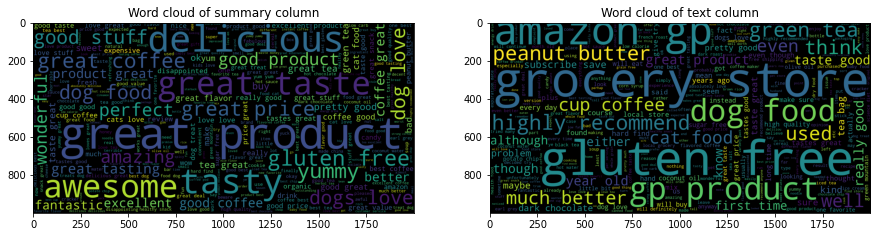

In [13]:
word_cloud(df)

In [14]:
print(len(df['ProductId'].unique())/len(df['ProductId'])*100)  # Number of unique Product as a percentage of total records
print(len(df['UserId'].unique())/len(df['UserId'])*100)  # Number of unique User as a percentage of total records

13.06377072165819
45.04641756989024


In [15]:
# Word Cloud Product wise
# top_10_product_list wrt to count of product
top_10_product_list = df.ProductId.value_counts().sort_values(ascending =False)[:10].index.tolist()
print(top_10_product_list)

['B007JFMH8M', 'B002QWP89S', 'B002QWHJOU', 'B0026RQTGE', 'B002QWP8H0', 'B003B3OOPA', 'B001EO5Q64', 'B0026KNQSA', 'B000VK8AVK', 'B001RVFERK']


In [16]:
df_top_10_prod = df[df.ProductId.isin(top_10_product_list)]

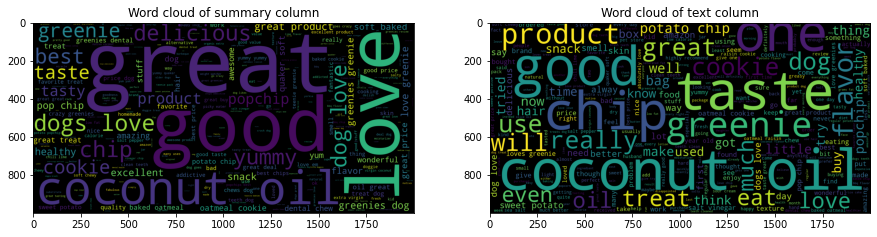

In [17]:
word_cloud(df_top_10_prod)

In [18]:
# Word Cloud Product wise
# bottom_10_product_list wrt to count of product
bottom_10_product_list = df.ProductId.value_counts().sort_values(ascending =True)[:10].index.tolist()
print(bottom_10_product_list)
df_bottom_10_prod = df[df.ProductId.isin(bottom_10_product_list)]

['B001L1EINC', 'B0056N1AHS', 'B002ESZ2P4', 'B001M0AM5U', 'B000H7ENL8', 'B004QGYSI4', 'B0001GCNYE', 'B003NCECLK', 'B0001626CI', 'B00380DRVI']


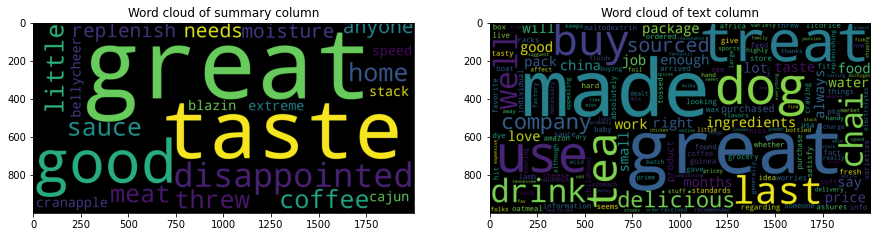

In [19]:
word_cloud(df_bottom_10_prod)

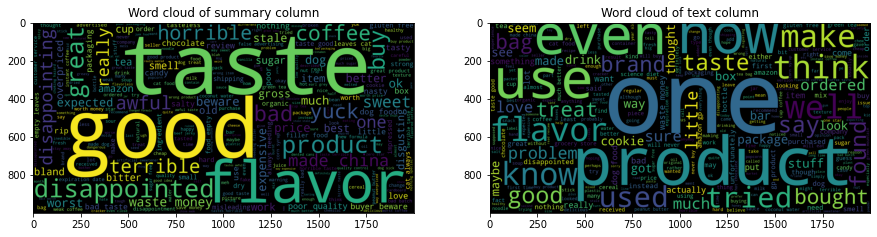

In [20]:
# Word Cloud Product wise
# Product having score less than 3
df_score_less_than_3 = df[df.Score.isin([1,2])]
word_cloud(df_score_less_than_3)

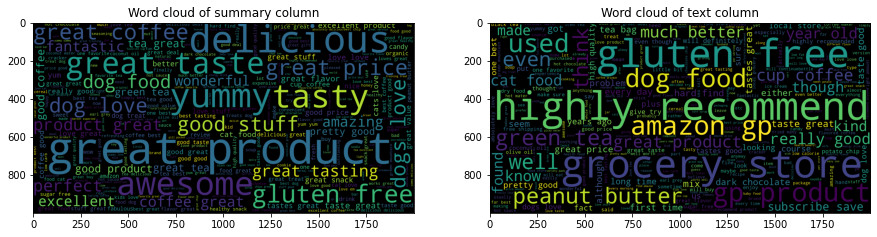

In [21]:
# Word Cloud Product wise
# Product having score greater than 3
df_score_greater_than_3 = df[df.Score.isin([4,5])]
word_cloud(df_score_greater_than_3)

In [16]:
# Yearwise analysis
df['Year'] = df.Time.apply(lambda x:x.year)
df.head(2) 

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...,2011
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...,2012


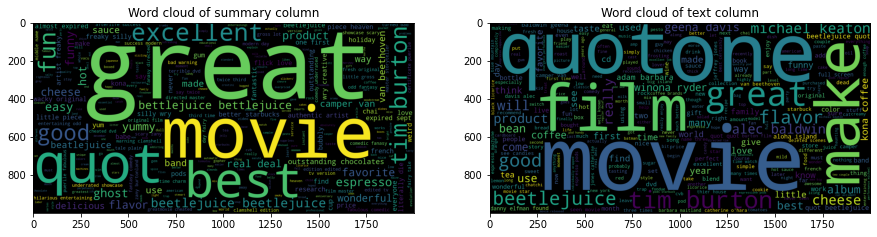

In [23]:
# Word Cloud Product wise
# year before 2004
df_year_before_2004 = df[df.Year < 2004]
word_cloud(df_year_before_2004)

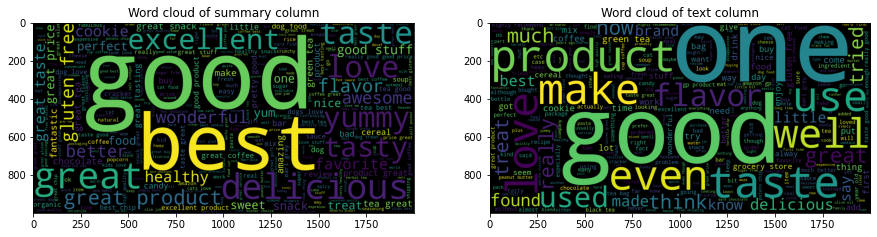

In [24]:
# Word Cloud Product wise
# year between 2004 and 2008
df_year_between_2004_2008 = df[df.Year.isin([2004,2005,2006,2007,2008])]
word_cloud(df_year_between_2004_2008)

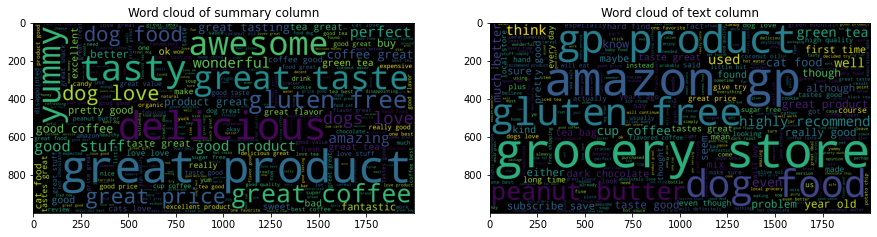

In [25]:
# Word Cloud Product wise
# year after2008
df_year_after_2008 = df[df.Year > 2008]
word_cloud(df_year_after_2008)

In [26]:
del df_year_after_2008, df_year_between_2004_2008, df_year_before_2004
del df_score_greater_than_3, df_score_less_than_3
del df_bottom_10_prod, bottom_10_product_list
del df_top_10_prod, top_10_product_list

# INFORMATION RETRIVAL

In [163]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances


**Model Training**

In [164]:
tfidf_summary = TfidfVectorizer(stop_words=stopwords,max_df=0.75,min_df=10,
                                token_pattern="[a-z']+")

tfidf_summary.fit(df['Summary'])

tfidf_summary_mat = tfidf_summary.transform(df['Summary'])
print(tfidf_summary_mat.shape)

tsvd_summary = TruncatedSVD(n_components=100,random_state=1234)

svd_mat_summary = tsvd_summary.fit_transform(tfidf_summary_mat) # Document aspect matrix
svd_mat_summary.shape  # Dense matrix

(568427, 7576)


(568427, 100)

In [165]:
tfidf_text = TfidfVectorizer(stop_words=stopwords,max_df=0.75,min_df=10,
                       token_pattern="[a-z']+")

tfidf_text.fit(df['Text'])

tfidf_text_mat = tfidf_text.transform(df['Text'])
print(tfidf_text_mat.shape)

tsvd_text = TruncatedSVD(n_components=100,random_state=1234)

svd_mat_text = tsvd_text.fit_transform(tfidf_text_mat) # Document aspect matrix
svd_mat_text.shape  # Dense matrix

(568427, 29807)


(568427, 100)

**Function For Query Search**

In [161]:
def lsa_query_search(query, column):
    query = query.lower()
    if column == 'Text':
        query_tfidf_transform = tfidf_text.transform([query])
        query_svd_transform = tsvd_text.transform(query_tfidf_transform)
        pair_wise_distance = pairwise_distances(X = svd_mat_text, Y = query_svd_transform, metric='cosine')
        index = np.argmin(pair_wise_distance)
    else:
        query_tfidf_transform = tfidf_summary.transform([query])
        query_svd_transform = tsvd_summary.transform(query_tfidf_transform)
        pair_wise_distance = pairwise_distances(X = svd_mat_summary, Y = query_svd_transform, metric='cosine')
        index = np.argmin(pair_wise_distance)

    print('Query found in document:',index)
    print(df.loc[index,column])

In [166]:
lsa_query_search('delicious food available here','Text')

Query found in document: 10168
how can pork be bad? truly a technical food marvel. people are stunned and amazed at microwave pork rinds. delicious!


In [32]:
lsa_query_search('delicious food available here','Summary')

30694
delicious and sensible food


# Word vector based analysis
**Find K similar Words**

**Model Fitting**

In [33]:
tsvd_word_vec = TruncatedSVD(n_components=200)  # Word Embedding
word_matrix = tsvd_word_vec.fit_transform(tfidf_summary_mat.T)

In [34]:
word_matrix_text = tsvd_word_vec.fit_transform(tfidf_text_mat.T)

**Word Query**

**Function To find K similar words**

In [35]:
def k_similar_word(word,k, column):
    word_2_query = word.lower()
    try:
        if column == 'Summary':
            word_query_array = word_matrix[tfidf_summary.vocabulary_[word_2_query],:].reshape(1,-1)
            word_2_query_pairwise_dist = pairwise_distances(X=word_matrix,Y=word_query_array)
            k_similar_words_index=np.argsort(word_2_query_pairwise_dist.flatten())[:k]
            id2word = {v:k for k,v in tfidf_summary.vocabulary_.items()}
            return [id2word[x] for x in k_similar_words_index]
        else:
            word_query_array = word_matrix_text[tfidf_text.vocabulary_[word_2_query],:].reshape(1,-1)
            word_2_query_pairwise_dist = pairwise_distances(X=word_matrix_text,Y=word_query_array)
            k_similar_words_index=np.argsort(word_2_query_pairwise_dist.flatten())[:k]
            id2word = {v:k for k,v in tfidf_text.vocabulary_.items()}
            return [id2word[x] for x in k_similar_words_index]
    except KeyError:
        print("*****Key Error******")
        print('Search some other word')

In [36]:
k_similar_word('food',10, 'Text')

['food',
 'dry',
 'wellness',
 'canned',
 'feed',
 'feeding',
 'pet',
 'foods',
 'wet',
 'health']

In [37]:
k_similar_word('nuts',10, 'Summary')

['nuts',
 'goes',
 'macadamia',
 'pine',
 'terrific',
 'looking',
 'almonds',
 'last',
 'mixed',
 'went']

In [38]:
k_similar_word('shah',10, 'Summary')

*****Key Error******
Search some other word


In [39]:
k_similar_word('Money',10,'Text')

['money',
 'waste',
 'saves',
 'spend',
 'value',
 'awful',
 'worst',
 'horrible',
 'terrible',
 'cheap']

In [40]:
k_similar_word('Money',10,'Summary')

['money',
 'waste',
 'save',
 'less',
 'saver',
 'total',
 'dont',
 'saved',
 'subscribe',
 'tree']

In [44]:
del tsvd_word_vec,word_matrix,word_matrix_text,tfidf_summary
del tfidf_summary_mat,tsvd_summary,svd_mat_summary, tfidf_text
del tfidf_text_mat,tsvd_text,svd_mat_text

In [59]:
import gc
gc.collect()

352

# LABELS AND TEXT

In [74]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [75]:
!pip install -U spacy

     |████████████████████████████████| 6.4 MB 4.9 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 621 kB 59.6 MB/s 
     |████████████████████████████████| 10.1 MB 42.0 MB/s 
     |████████████████████████████████| 456 kB 48.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [1]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 460.2 MB 6.9 kB/s 
     |████████████████████████████████| 40 kB 2.7 MB/s 
     |████████████████████████████████| 2.6 MB 8.1 MB/s 
     |████████████████████████████████| 998 kB 59.4 MB/s 
     |████████████████████████████████| 3.3 MB 40.2 MB/s 
     |████████████████████████████████| 895 kB 73.7 MB/s 
     |████████████████████████████████| 636 kB 66.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [36]:
import spacy, nltk, textblob
from bs4 import BeautifulSoup

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
all_summary = " ".join(df.Summary.tolist())
all_text = " ".join(df.Text)

In [40]:
bsObj_summary = BeautifulSoup(all_summary)
bsObj_text = BeautifulSoup(all_text)


In [41]:
all_summary = bsObj_summary.text
all_text = bsObj_text.text

In [42]:
tokenizer = nltk.tokenize.RegexpTokenizer("[a-z0-9']+")
tokens_summary = tokenizer.tokenize(all_summary.lower())
tokens_text = tokenizer.tokenize(all_text.lower())

In [43]:
print(tokens_summary[:10])

['good', 'quality', 'dog', 'food', 'not', 'as', 'advertised', 'delight', 'says', 'it']


In [44]:
print(tokens_text[:10])

['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food']


In [45]:
text_summary = nltk.text.Text(tokens_summary)
text_text = nltk.text.Text(tokens_text)
print(text_summary.vocab())  #frequency dist of words
print(text_text.vocab())  #frequency dist of words


<FreqDist with 35388 samples and 2342730 outcomes>
<FreqDist with 146963 samples and 45594195 outcomes>


In [46]:
nlp = spacy.load('en_core_web_trf')

In [57]:
len(all_summary)

13894624

In [95]:
parsed_text = nlp(all_summary[:100000])
ents = parsed_text.ents

In [111]:
label_N_text = []
for ent in ents:
    label_N_text.append([ent.label_, '---text:',ent.text])

In [113]:
label_N_text.sort()
label_N_text

[['CARDINAL', '---text:', '0'],
 ['CARDINAL', '---text:', '1'],
 ['CARDINAL', '---text:', '1'],
 ['CARDINAL', '---text:', '1'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '100'],
 ['CARDINAL', '---text:', '12'],
 ['CARDINAL', '---text:', '12'],
 ['CARDINAL', '---text:', '144'],
 ['CARDINAL', '---text:', '2'],
 ['CARDINAL', '---text:', '2'],
 ['CARDINAL', '---text:', '2'],
 ['CARDINAL', '---text:', '2'],
 ['CARDINAL', '---text:', '2'],
 ['CARDINAL', '---text:', '20'],
 ['CARDINAL', '---text:', '20'],
 ['CARDINAL', '---text:', '24'],
 ['CARDINAL', '---text:', '24'],
 ['CARDINAL', '---text:', '24'],
 ['CARDINAL', '---text:', '25'],
 ['CARDINAL', '---text:', '3'],
 ['CARDINAL', '---text:', '3'],
 ['CARDINAL', '---text:', '30'],
 ['CARDINAL', '---text:', '35'],
 ['CARDINAL', '---text:', '35'],
 ['CARDINAL',

In [150]:
label_N_text_dict = {}
for ent in ents:
    try:
        label_N_text_dict[ent.label_].append(ent.text)
    except:
        label_N_text_dict[ent.label_] = [ent.text]

In [154]:
print(label_N_text_dict['PERSON'])

['scott', 'vickie', 'rudolph', 'scottie', 'buster', 'cadbury', 'jeremiah', 'lucy', 'rich j wyzykoski', 'jgk', 'stephen baldwin', 'ddjj', 'grammy', 'grammy', 'squism', 'otto', 'may', 'baxter', 'mays', 'mays', 'may', 'may', 'lacey', 'amedei', 'bpa', 'melitta', 'hannah', 'hannah']


In [156]:
print(label_N_text_dict['ORG'])

['mcanns', "hammer nutrition 's", 'amazon', 'amazon', 'arrowhead mills', 'french', 'franch', "plocky's", "plocky's", 'plocky', 'plocky', 'annie', 'kellogg', 'kelloggs', 'mueslix', 'kellogg', 'pruduct', 'amazon', 'amazon', 'harmony farms', 'penta', 'costco b&m', 'rishi', 'baci', "bob's", 'italy', 'amazon', 'parmesan heaven', 'amazon', 'starbucks', 'keurig', 'keurig', 'keurig', 'keurig', 'amazon', 'eden', 'hodgson mill', "woeber's", 'tang', 'amazon', 'kuhflecken chocolate bar']


In [157]:
print(label_N_text_dict['NORP'])

['english', 'eukanuba', 'swiss', 'swedish', 'belgian', 'latin', 'thai', 'thai', 'thai', 'english', 'japanese', 'asian', 'asian', 'english', 'israelis', 'italian', 'thai', 'thai', 'thai', 'belgian', 'belgian', 'italian', 'italian', 'indian', 'amish', 'amish', 'amish', 'amish', 'amish', 'belgian', 'chinese', 'indian', 'parisian']


In [158]:
print(label_N_text_dict['GPE'])

['michigan', 'gevalia', 'indonesia', 'china', 'china', 'china', 'china', 'new england', 'new york', 'washington', 'italy', 'thai', 'thailand', 'tijuana']


In [159]:
print(label_N_text_dict['LOC'])

['earth', 'earth', 'earth', 'southwest']


In [160]:
print(label_N_text_dict['DATE'])

['every day', '2 days', 'years', '1866', 'the century', '11', 'feb 19, 2012', 'ten year old', 'weekend', 'christmas', 'all summer', 'summer', 'summer', '7 month old', '18month old', 'one day', '10/2012', 'today', 'winter', 'winter', 'winter', 'winter', "the good ol' days", 'a year']


# SENTIMENT ANALYSIS

In [114]:
from transformers import pipeline

In [115]:
sentiment_analyzer = pipeline('sentiment-analysis')

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [116]:
def sentiment_score(x):
    sentiment = sentiment_analyzer(x)
    score = sentiment[0]['score']
    label = sentiment[0]['label']
    if label == 'NEGATIVE':
        return -1*score
    else:
        return score

In [117]:
df.iloc[:10,:].Summary.apply(sentiment_score)

0    0.999817
1   -0.984526
2    0.999890
3   -0.992338
4    0.999810
5    0.999812
6    0.999880
7    0.999887
8   -0.933100
9    0.999647
Name: Summary, dtype: float64

**Change in sentiment over time**

In [118]:
groubBy_yearNproduct_df = df.groupby(['Year','ProductId']).first().reset_index()
groubBy_yearNproduct_df.set_index('Year',inplace=True)
groubBy_yearNproduct_df.head(10)

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Year,,,,,,,,
1999,0006641040,AJ46FKXOVC7NR,2,2,5,1999-10-25,this whole series is great way to spend time w...,i can remember seeing the show when it aired o...
1999,B00004CI84,A344SMIA5JECGM,1,2,5,1999-12-06,a modern day fairy tale,"a twist of rumplestiskin captured on film, sta..."
1999,B00004CXX9,AIUWLEQ1ADEG5,0,0,5,1999-12-02,entertainingl funny!,beetlejuice is a well written movie ..... ever...
1999,B00004RYGX,A344SMIA5JECGM,1,2,5,1999-12-06,a modern day fairy tale,"a twist of rumplestiskin captured on film, sta..."
2000,B00002N8SM,A32DW342WBJ6BX,0,0,5,2000-01-24,a sure death for flies,i bought a few of these after my apartment was...
2000,B00002Z754,A3B8RCEI0FXFI6,10,10,5,2000-06-29,wow make your own 'slickers' !,i just received my shipment and could hardly w...
2000,B00004CI84,A1B2IZU1JLZA6,19,23,1,2000-01-19,warning: clamshell edition is edited tv version,"i, myself always enjoyed this movie, it's very..."
2000,B00004CXX9,AJH6LUC1UT1ON,0,0,5,2000-01-03,fantastic!,beetlejuice is an excellent and funny movie. k...
2000,B00004RAMX,A5NQLNC6QPGSI,7,8,5,2000-07-31,end your gopher problems,i have just recently purchased the woodstream ...


In [125]:
groubBy_yearNproduct_df.index.unique()

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64', name='Year')

In [126]:
sentiment_score_yearWiseList = groubBy_yearNproduct_df.loc[[1999,2000,2001,2002,
                                                            2003,2004,2005,2006],
                                                           'Summary'].apply(sentiment_score)

In [127]:
# sentiment_score_yearWiseList

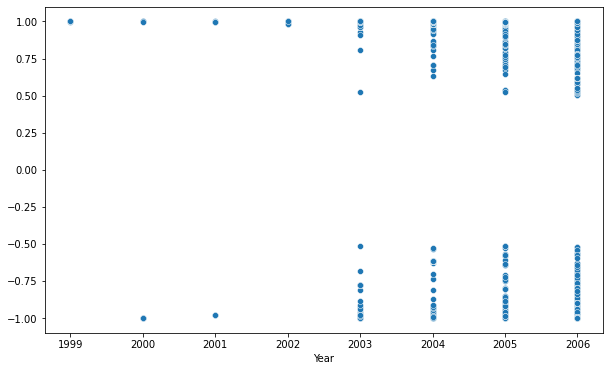

In [132]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=sentiment_score_yearWiseList.index,y=sentiment_score_yearWiseList.values)
plt.show()

**Change in Sentiment of Product over the year**

In [133]:
groubBy_yearNproduct_df = df.groupby(['ProductId','Year']).first().reset_index()
groubBy_yearNproduct_df.set_index('ProductId',inplace=True)
groubBy_yearNproduct_df.head(10)

,Year,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,
0006641040,1999,AJ46FKXOVC7NR,2,2,5,1999-10-25,this whole series is great way to spend time w...,i can remember seeing the show when it aired o...
0006641040,2001,A1IJKK6Q1GTEAY,2,2,5,2001-12-26,it was a favorite!,this was a favorite book of mine when i was a ...
0006641040,2002,A3CMRKGE0P909G,3,4,5,2002-04-10,a great way to learn the months,this is a book of poetry about the months of t...
0006641040,2003,A3E7R866M94L0C,2,2,5,2003-10-11,can't explain why,this book has been a favorite of mine since i ...
0006641040,2004,AMX0PJKV4PPNJ,71,72,4,2004-09-29,read it once. read it twice. reading chicken s...,"these days, when a person says, ""chicken soup""..."
0006641040,2005,A2QXYSXGQ2PKAU,3,3,3,2005-10-17,disappointed,when i ordered a large amount of these books t...
0006641040,2007,AYZ0PR5QZROD1,3,3,5,2007-03-08,family favorite,all of my children love this book. my first g...
0006641040,2008,AQEYF1AXARWJZ,1,1,4,2008-06-01,chicken soup with rice,a very entertaining rhyming story--cleaver and...
0006641040,2009,A3R5XMPFU8YZ4D,1,1,5,2009-02-07,so fun to read,this is my grand daughter's and my favorite bo...


In [176]:
def plot_score_for_product(procuctId):
    sentiment_score_yearWiseList = groubBy_yearNproduct_df.loc[[procuctId],'Summary'].apply(sentiment_score)
    year_list = groubBy_yearNproduct_df.loc[[procuctId],'Year'].unique()
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=year_list,y=sentiment_score_yearWiseList.values)
    plt.show()

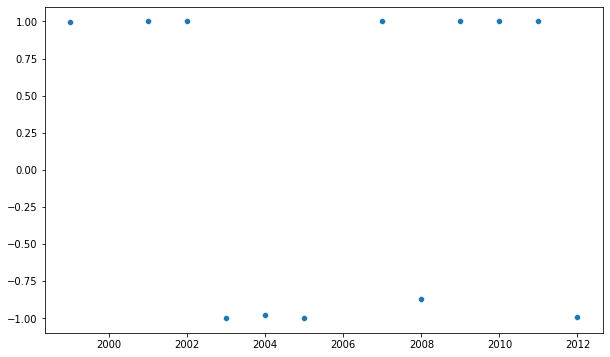

In [177]:
plot_score_for_product('0006641040')

Variation of sentiment for product 0006641040


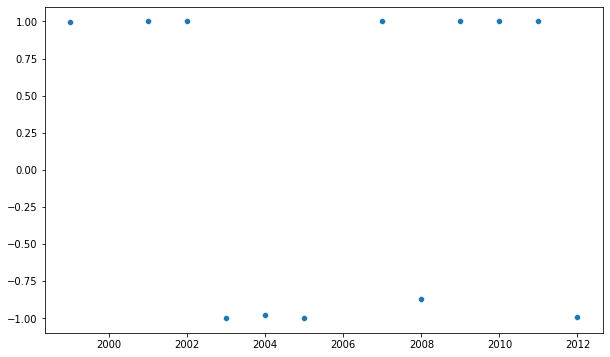





Variation of sentiment for product 141278509X


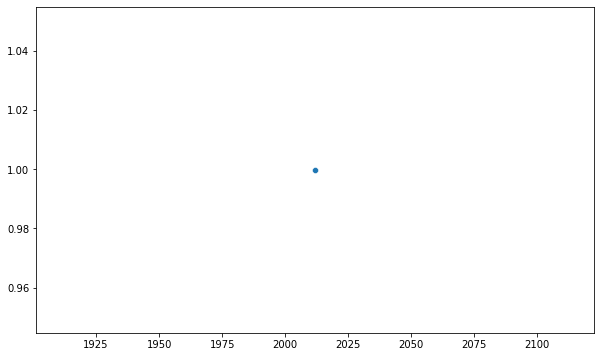





Variation of sentiment for product 2734888454


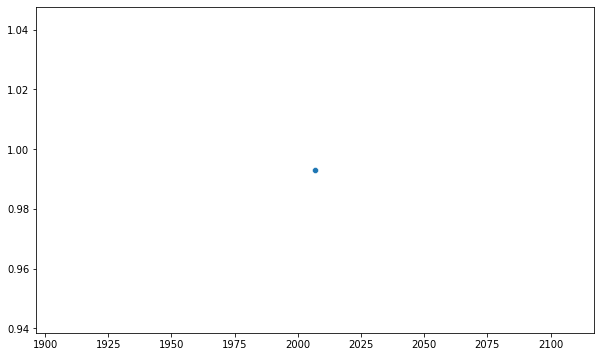





Variation of sentiment for product 2841233731


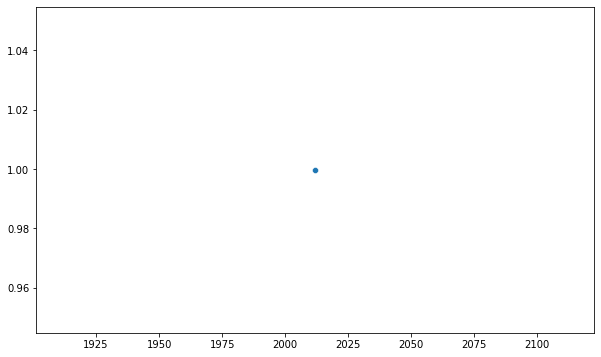





Variation of sentiment for product 7310172001


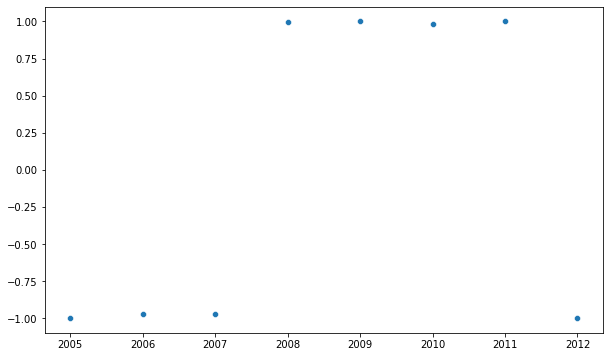





Variation of sentiment for product 7310172101


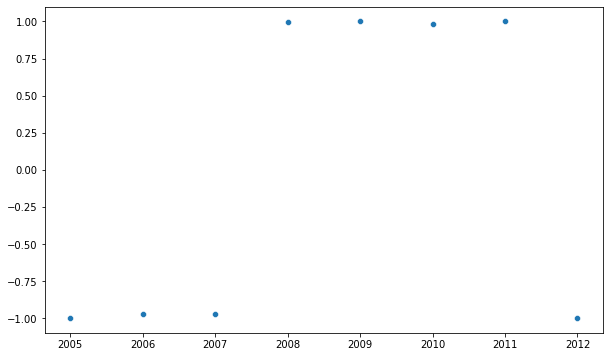





Variation of sentiment for product 7800648702


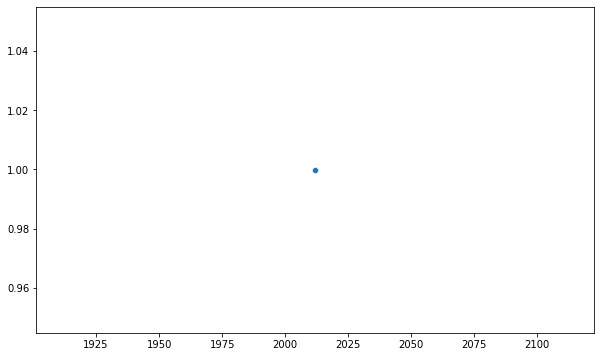





Variation of sentiment for product 9376674501


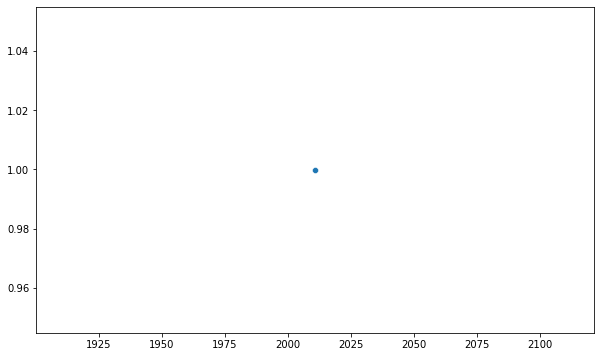





Variation of sentiment for product B00002N8SM


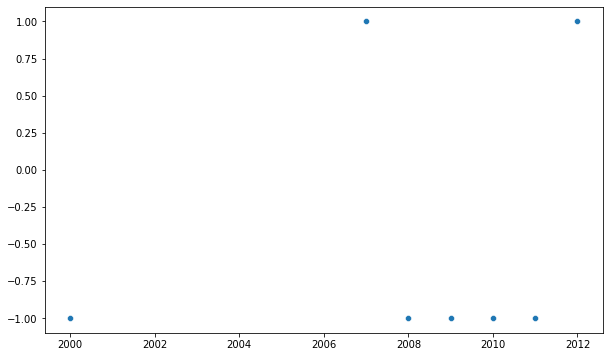





Variation of sentiment for product B00002NCJC


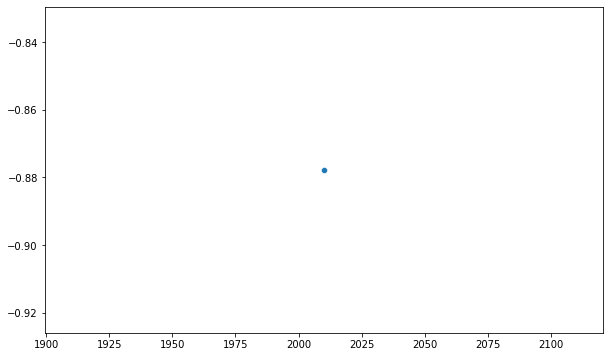

In [175]:
count = 0
for product in groubBy_yearNproduct_df.index.unique():
    print('Variation of sentiment for product', product)
    plot_score_for_product(product)
    print('\n\n\n')
    count += 1
    if count == 10:
        break

In [193]:
def plot_score_for_product2(productId):
    product_df = df[df.ProductId==productId].copy()
    product_df['sentimentScore'] = product_df['Summary'].apply(sentiment_score)
    print('Variation of sentiment for product', product)

    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Year',y='sentimentScore',data=product_df)
    
    print('\n\n\n')
    plt.show()

Variation of sentiment for product B001E4KFG0






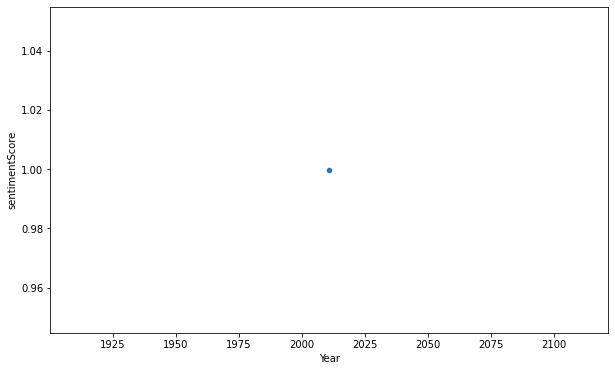

Variation of sentiment for product B00813GRG4






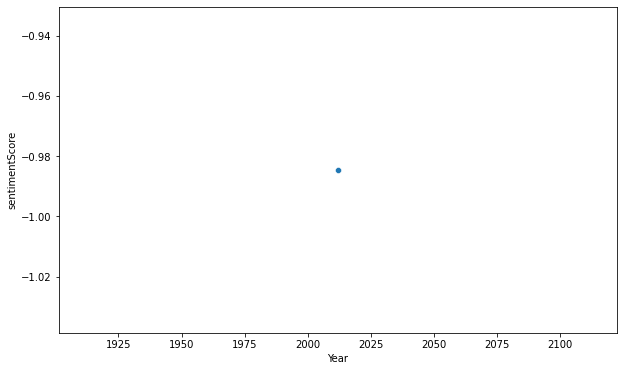

Variation of sentiment for product B000LQOCH0






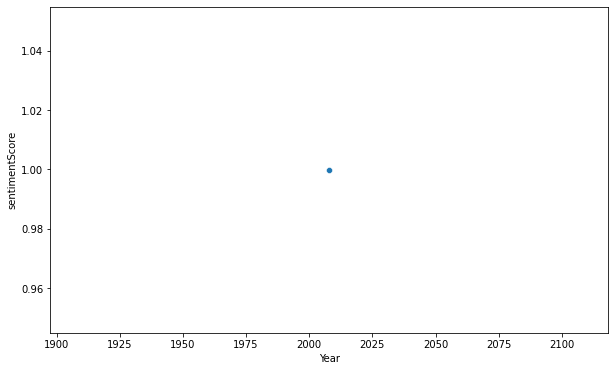

Variation of sentiment for product B000UA0QIQ






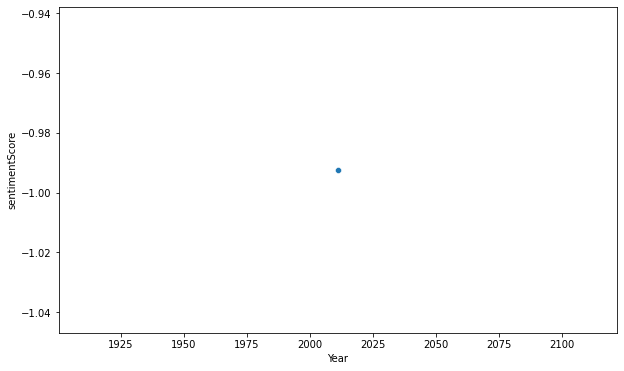

Variation of sentiment for product B006K2ZZ7K






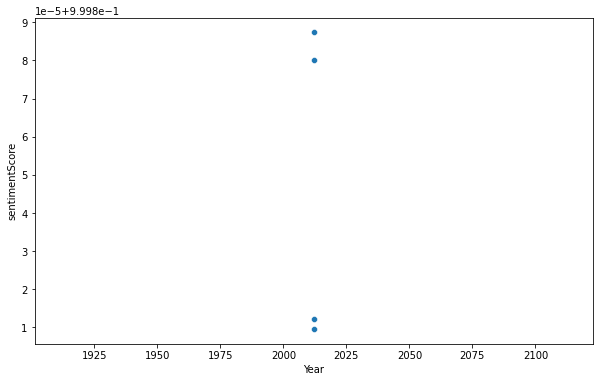

Variation of sentiment for product B000E7L2R4






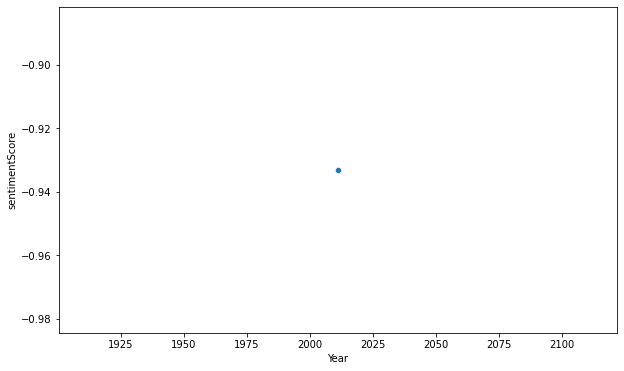

Variation of sentiment for product B00171APVA






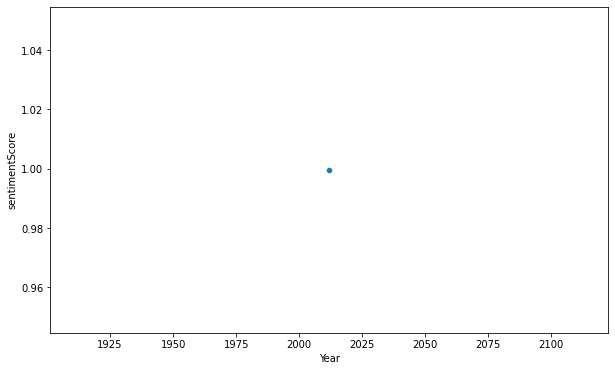

Variation of sentiment for product B0001PB9FE






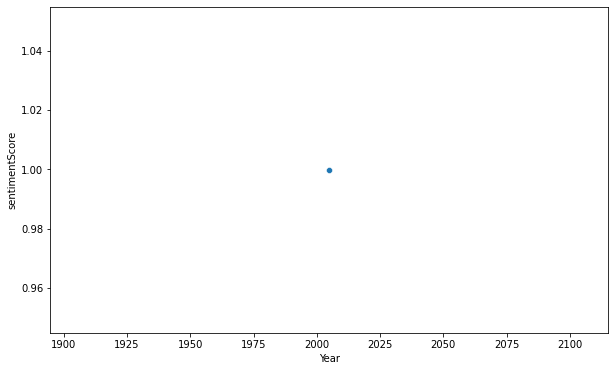

Variation of sentiment for product B0009XLVG0






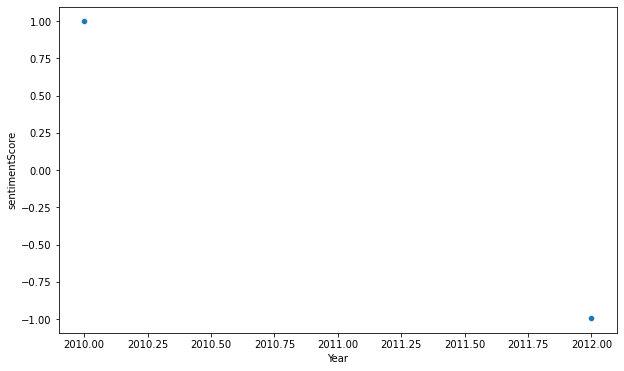

Variation of sentiment for product B001GVISJM






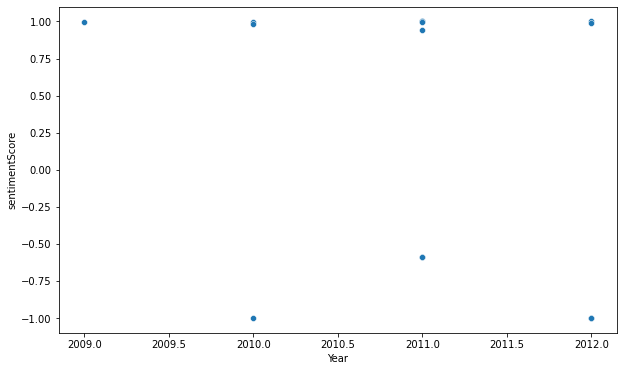

In [194]:
count = 0
for product in df.ProductId.unique():
    plot_score_for_product2(product)
    count += 1
    if count ==  10:
        break